In [1]:
import os , sys
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../scripts/model_training/Forecast_future_market_trends'))
sys.path.append(os.path.abspath('../scripts/model_training'))

In [2]:
import predict_future_market_trends as pfmt
import ARIMA_model as am
import time_series_forecasting_model as tsfm

In [3]:
import pandas as pd
data = pd.read_csv('../data/dataset.csv')

In [4]:
train_data ,test_data = tsfm.train_test_split(data ,0.8)

INFO:time_series_forecasting_model:spliting the data into the train and test df


In [5]:
arima_fitted , forecast_arima= am.arima_model(train_data ,test_data)

INFO:ARIMA_model:ARIMA model training and prediction
INFO:ARIMA_model:Parameter selection


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6259.861, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6261.807, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6261.809, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6261.658, Time=0.02 sec


INFO:ARIMA_model:Training the ARIMA model
INFO:ARIMA_model:Forecasting on test set


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6263.784, Time=1.54 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 9.150 seconds
The forecast of the test data is: [356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.77999878 356.77999878 356.77999878
 356.77999878 356.77999878 356.

In [6]:
steps_ahead = 12  # Forecasting for 12 months
arima_predictions, arima_conf_int = pfmt.generate_forecast(arima_fitted, steps_ahead, model_type="arima")

c:\Users\bekib\Desktop\10ACADAMY\WEEK-ELEVEN\week-11\scripts\model_training\Forecast_future_market_trends\predict_future_market_trends.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=test_data.index[-1], periods=len(forecast) + 1, freq='M')[1:]


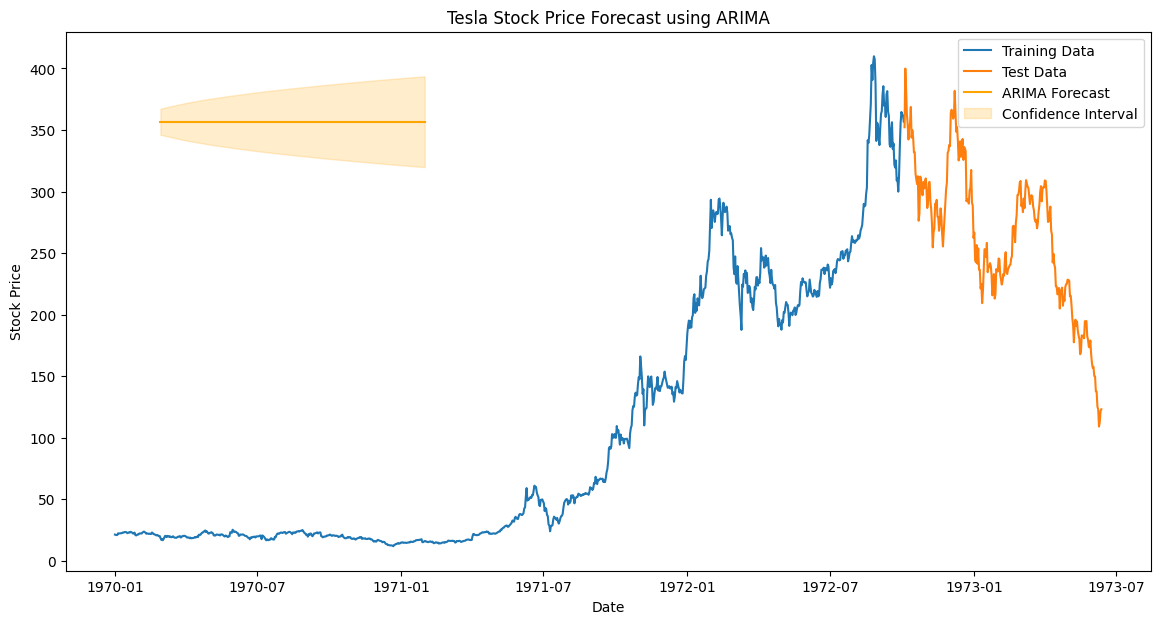

In [7]:
pfmt.plot_forecast(train_data["TSLA"], test_data["TSLA"], arima_predictions, conf_int=arima_conf_int, model_name="ARIMA")
